# Binary Classification with a Bank Churn Dataset 

Goal: For this Episode of the Series, your task is to predict whether a customer continues with their account or closes it (e.g., churns). Good luck!
For each id in the test set, you must predict the probability for the target variable Exited.
train.csv - the training dataset; Exited is the binary target
test.csv - the test dataset; your objective is to predict the probability of Exited

## Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

## Import the dataset

In [3]:
path1 = "C:/Users/julia/Downloads/playground-series-s4e1(1)/train.csv"
path2 = "C:/Users/julia/Downloads/playground-series-s4e1(1)/test.csv" 
traindata = pd.read_csv(path1)
testdata = pd.read_csv(path2)

## Check and Analyze the dataset

In [4]:
# check informations of train and test dataset
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [6]:
# check wether there are missing data
traindata.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
testdata.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [8]:
traindata.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [9]:
testdata.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


## Descriptive of all features

In [10]:
traindata.describe()
# from the table, we can see there are big gaps between mean and 50% for balance, which means that balance is right schewd servously. 

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


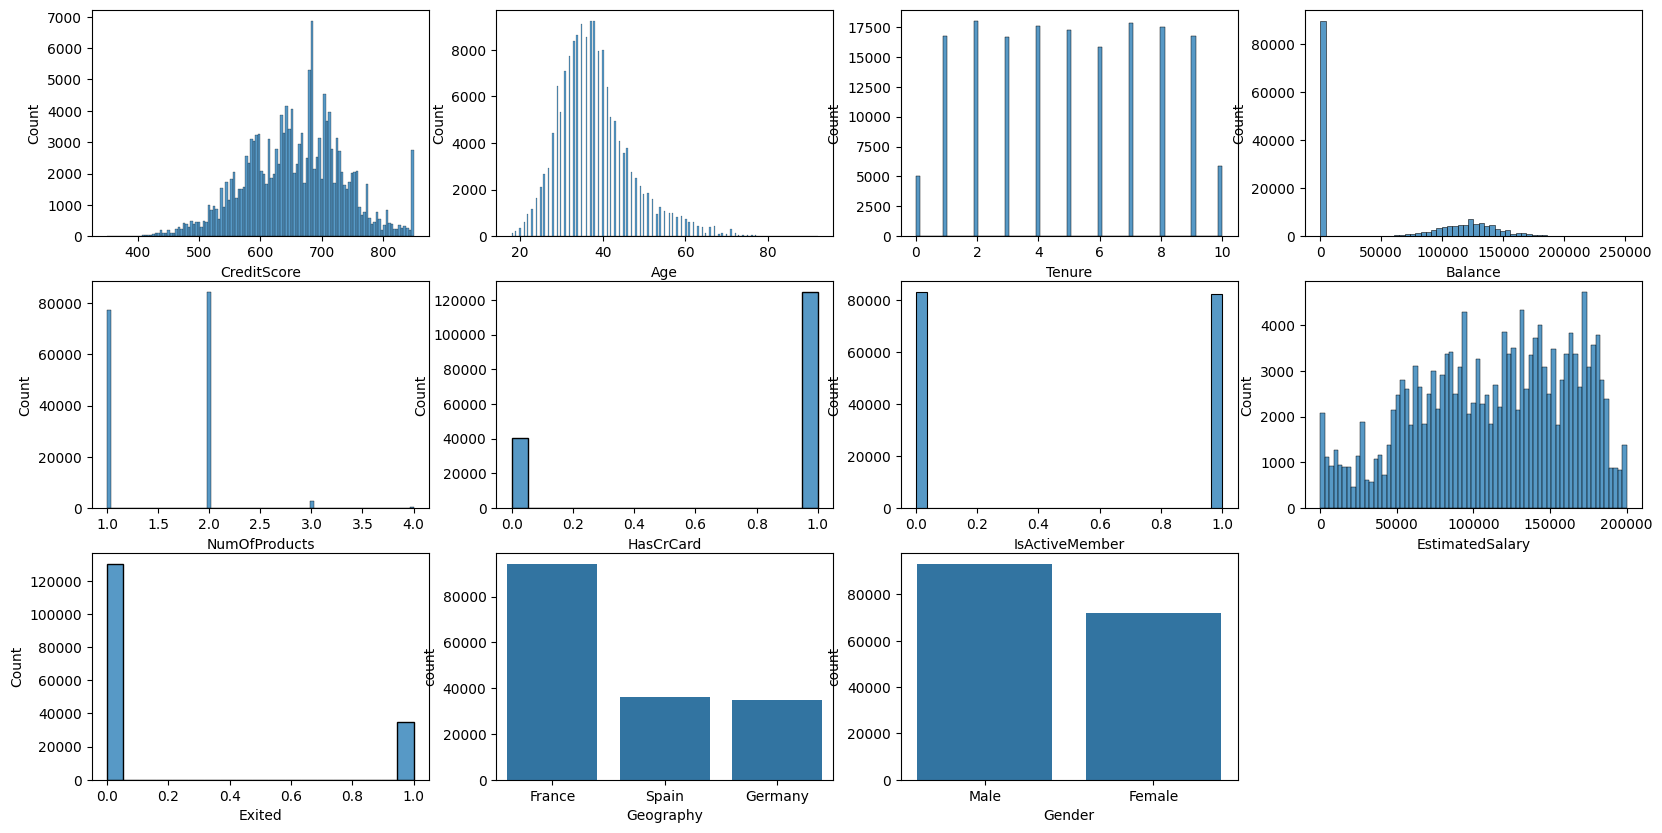

In [11]:
# now plot the destribution of the all features
num_features = len(traindata.columns)

# find the fature which is numerical
numerical_feature = traindata.select_dtypes(include = 'number').columns

# find the feature whihc is object 
object_feature = traindata.select_dtypes('object').columns


fig, axes = plt.subplots(3, 4, figsize = (20, 10))
axes = axes.flatten()
for i, j in enumerate(numerical_feature[2:]):
  sns.histplot(data = traindata, x = j, ax = axes[i])
for mi, j in enumerate(object_feature[1:], start= i +1 ):
  sns.countplot(data = traindata, x = j, ax = axes[mi])
axes[-1].set_axis_off()
plt.show()

##### From the above plots, we can see that hascrcard in this train data is not balance, as well as geography and gender, balance is right schewed.

## Add plot of Exited vs all other features

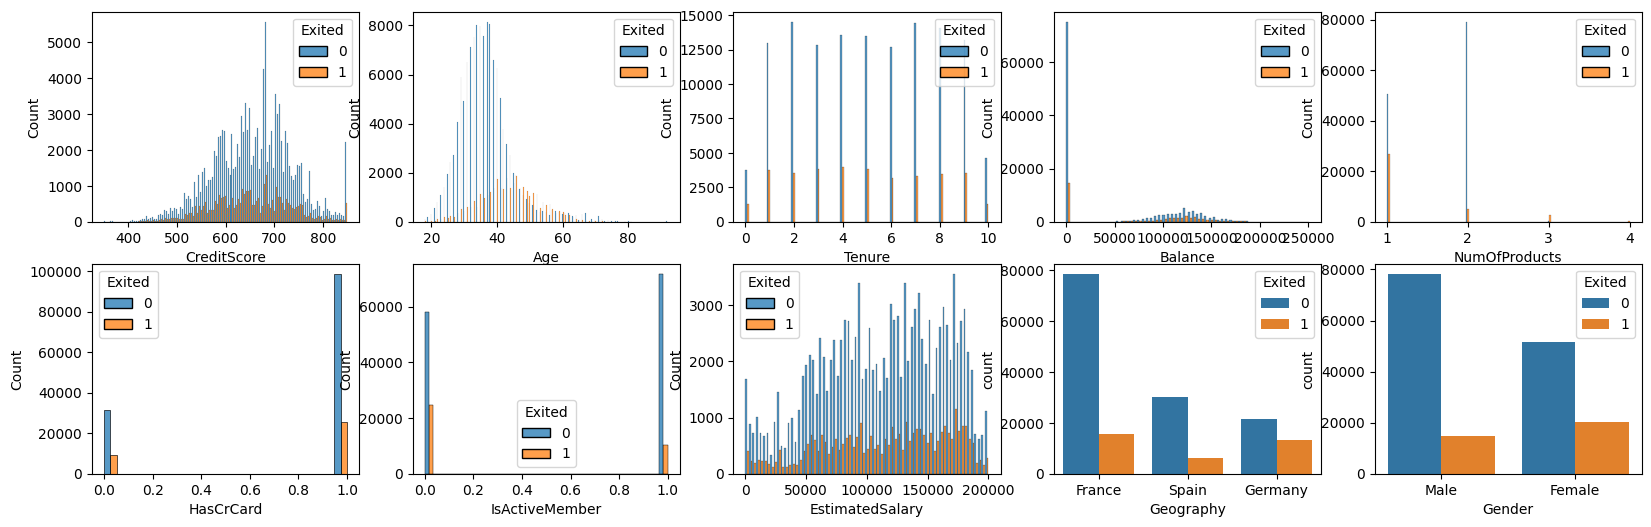

In [25]:
# plot of valuable features vs exited 
from operator import mul


fig, axes = plt.subplots(2, 5, figsize = (20, 6))
axes = axes.flatten()
xlist = numerical_feature.drop(['Exited', 'id', 'CustomerId'])
xlist1 = object_feature

for i, j in enumerate(xlist):
  sns.histplot(data = traindata, x = j, hue = 'Exited', multiple = 'dodge', common_bins= True , ax = axes[i])
for mi, j in enumerate(xlist1[1:]):
  sns.countplot(data = traindata, x = j, hue = 'Exited', dodge= True, ax= axes[mi +i +1])
plt.show()

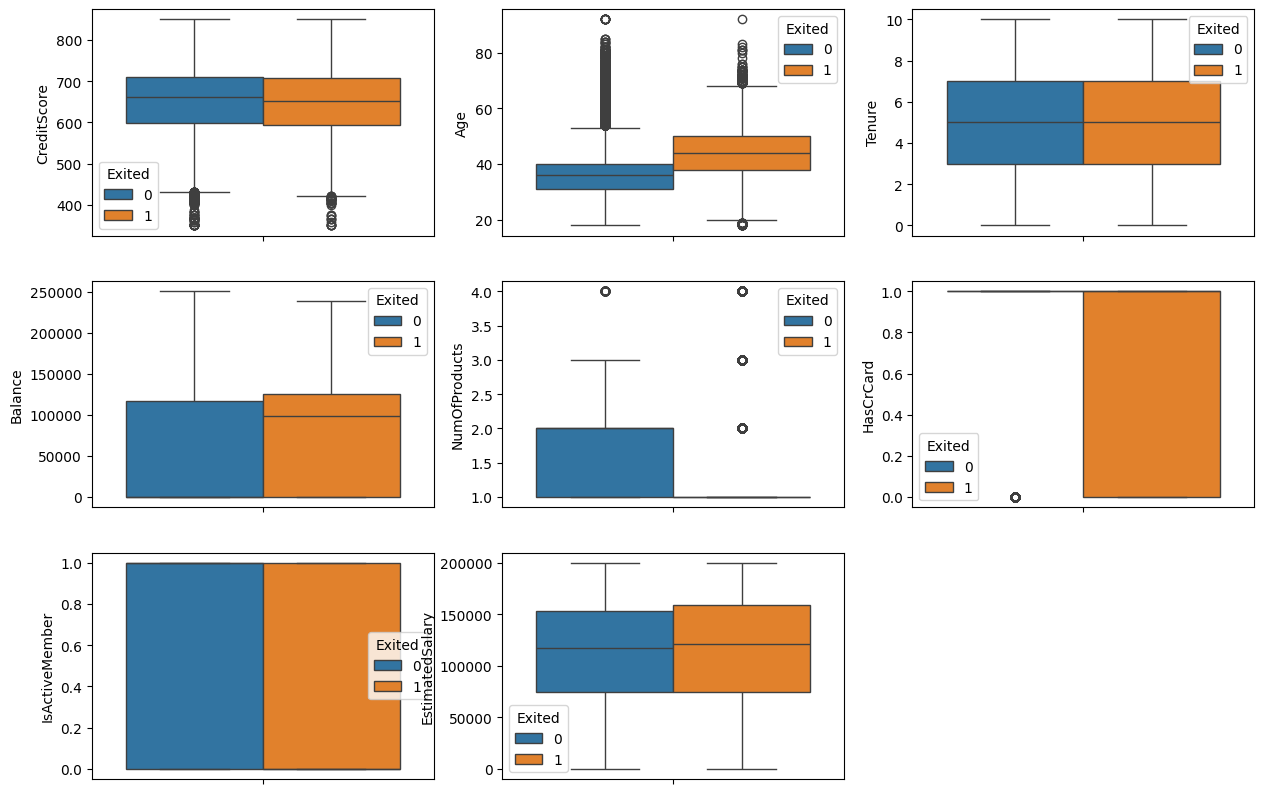

In [43]:
# plot boxplot and detect outlier for numerical features
fealist = numerical_feature[2:-1]
fig, axes = plt.subplots(3, 3, figsize = (15, 10))
axes = axes.flatten()
for i,j in enumerate(fealist):
  sns.boxplot(data = traindata, y = j, ax = axes[i], hue = 'Exited')
axes[-1].set_axis_off()
plt.show()

##### From the above plots, we can see that IActiveMember and age, NumOfProducts, Geography, HasCrCard  are important for exited 

## Build model to train the traindata

In [ ]:
# use logistic regression to train the traindata
model_log = LogisticRegression()
model